# Al-Qur'an

Al-Qur'an adalah kitab suci umat Islam di seluruh dunia yang berfungsi sebagai petunjuk bagi manusia dalam mengarahkan kehidupannya agar mencapai kehidupan yang bahagia di dunia dan di akhirat.

Ditinjau dari segi kebahasaan (etimologi), Al-Qur'an berasal dari bahasa Arab yang berarti "bacaan" atau "sesuatu yang dibaca berulang-ulang". Kata Al-Qur'an adalah bentuk kata benda (masdar) dari kata kerja qara'a yang artinya membaca.

Al-quran menurut terminologi yaitu firman Allah yang mengandung mukjizat yang diturunkan kepada rasul atau Baginda Rasulullah shallallahu alaihi wa sallam nabi Muhammad shallallahu alaihi wasallam dengan perantara malaikat jibril yang tertulis di dalam mushab itu yang disampaikan kepada kita secara mutawatir, yang membacanya dianggap ibadah dimulai dari surat Al-Fatihah dan diakhiri dengan surat An-Nas.

Secara garis besar, Al-Qur'an mengandung ajaran tentang aqidah, syariah, dan akhlak, namun al-Qur'an juga mengandung isyarat-isyarat ilmiah yakni mengandung ayat-ayat sains dan teknologi. Tidak diragukan lagi, ini adalah karya terbaik dalam literatur Arab dan diwahyukan oleh Allah (Tuhan) kepada Rasul-Nya, Nabi Muhammad Shalallahu alayhi wa sallam melalui malaikat Jibril.

Diwahyukan secara berangsur-angsur kepada Nabi Muhammad Shalallahu alayhi wa sallam mulai dari 17 Ramadan 610 Masehi hingga 632 Masehi yang bertepatan dengan wafatnya Nabi Muhammad Shalallahu Alayhi wa sallam. Kitab ini dibagi menjadi 30 juz, 114 Surah dan 6.000+ ayat

# Import Library

In [1]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ar_wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install arabic_reshaper --quiet
!pip install python-bidi --quiet
!pip install requests --quiet


In [5]:
pip install --upgrade arabic-reshaper

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import arabic_reshaper 
from bidi.algorithm import get_display
import requests as r
from bs4 import BeautifulSoup
import re
import os
from ar_wordcloud import ArabicWordCloud


# Load Dataset & Memahami Data

Import dataset yang berisi ayat-ayat alquran beserta nomor surah dan nomor ayat

In [7]:
quran_english = pd.read_csv('/workspaces/codespaces-jupyter/data/the-holy-quran/en.yusufali.csv')

quran_english

,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
1,1,2,"Praise be to Allah, the Cherisher and Sustaine..."
2,1,3,"Most Gracious, Most Merciful;"
3,1,4,Master of the Day of Judgment.
4,1,5,"Thee do we worship, and Thine aid we seek."
...,...,...,...
6231,114,2,"The King (or Ruler) of Mankind,"
6232,114,3,"The god (or judge) of Mankind,-"
6233,114,4,"From the mischief of the Whisperer (of Evil), ..."
6234,114,5,(The same) who whispers into the hearts of Man...


Mengecek jumlah surah dan total ayat dari dataframe quran_english

In [8]:
quran_english.shapetotal_surahs = quran_english['Surah'].nunique()
total_ayahs = quran_english.shape[0]
total_surahs = quran_english.shapetotal_surahs

total_surahs, total_ayahs


(114, 6236)

Dari output di atas menunjukkan:
*   Al-Quran memiliki 6.236 ayat, tidak termasuk Bismillahirrahmanirrahim.
*   6.348 ayat termasuk Bismillahirrahmanirrahim.
*   Al-Quran dibagi menjadi 114 bab, yang disebut surah, dan setiap surah dibagi menjadi sejumlah ayat






Mengecek surah yang mengandung kata "Bismillahirrahmanirrahim." dari dataset quran_english

In [9]:
quran_english[quran_english['Text'].str.contains('In the name of Allah, Most Gracious, Most Merciful')]


,Surah,Ayah,Text
0,1,1,"In the name of Allah, Most Gracious, Most Merc..."
3188,27,30,"""It is from Solomon, and is (as follows): 'In ..."



Dari hasil di atas dapat diketahui:
*   "Bismillahirrahmanirrahim" berarti "Dengan menyebut nama Allah Yang Maha Pengasih lagi Maha Penyayang"
*   Ada 2 surah yang mengandung kata "Bismillahirrahmanirrahim" yaitu Surah Al-Fatihah ayat 1 dan Surah An-Naml (27) ayat 30



Selanjutnya, dilakukan pengecekan nilai null (kosong) pada dataframe quran_english

In [10]:
# Memeriksa value null jika ada untuk memastikan dataset bebas dari kesalahan.
quran_english.isna().sum()

Surah    0
Ayah     0
Text     0
dtype: int64

Dari hasil di atas terlihat tidak ada data yang bernilai null, selanjutnya mengimpor dataset yang berisikan daftar nama-nama surah dalam Al-Qur'an dan beri nama dataframe menjadi surah_names

In [11]:
# Import dataset nama surah
surah_names = pd.read_csv('/workspaces/codespaces-jupyter/data/surah-names/surah_names_english.csv', names=['Surah', 'Surah Name'])

# Menghapus whitespace di awal nama
surah_names["Surah Name"] = surah_names["Surah Name"].str[1:]

surah_names

,Surah,Surah Name
0,1,Al-Fatihah (the Opening)
1,2,Al-Baqarah (the Cow)
2,3,Aali Imran (the Family of Imran)
3,4,An-Nisa’ (the Women)
4,5,Al-Ma’idah (the Table)
...,...,...
109,110,An-Nasr (the Help)
110,111,Al-Masad (the Palm Fiber)
111,112,Al-Ikhlas (the Sincerity)
112,113,Al-Falaq (the Daybreak)


Menggabungkan dataframe surah_names dengan dataframe quran_english berdasarkan nomor surah

In [12]:
#Menggabungkan dataset quran_english dengan surah_names
quran_english_with_surah = quran_english.merge(surah_names, on='Surah')
quran_english_with_surah.index = np.arange(1,6236+1)

quran_english_with_surah

,Surah,Ayah,Text,Surah Name
1,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening)
2,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening)
3,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening)
4,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening)
5,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening)
...,...,...,...,...
6232,114,2,"The King (or Ruler) of Mankind,",An-Nas (Mankind)
6233,114,3,"The god (or judge) of Mankind,-",An-Nas (Mankind)
6234,114,4,"From the mischief of the Whisperer (of Evil), ...",An-Nas (Mankind)
6235,114,5,(The same) who whispers into the hearts of Man...,An-Nas (Mankind)


Import dataset dataset-verse-by-verse dan beri nama dataframe tersebut arabic_original dan hanya ambil kolom AyahNo, SurahNo, ArabicText, dan Classification, lalu rename kolom-kolom tersebut agar sama seperti dataframe quran_english_with_surah

In [13]:
arabic_original = pd.read_excel('/workspaces/codespaces-jupyter/data/the-holy-quran/Dataset-Verse-by-Verse.xlsx')
arabic_originals = arabic_original[['SurahNo', 'AyahNo', 'Classification']]
arabic_originals.columns = ['Surah', 'Ayah', 'Classification']

arabic_original_quran = pd.read_csv('/workspaces/codespaces-jupyter/data/Quran-clean-without-aarab.csv', index_col=None)
arabic_original_quranic = arabic_original_quran[['SurahNum', 'AyahNum', 'Ayah']]
arabic_original_quranic.rename(columns={'Ayah': 'AyahText'}, inplace=True)
arabic_original_quranic.columns = ['SurahNum', 'AyahNum', 'AyahText']

arabic_original_quranic, arabic_originals

/tmp/ipykernel_23585/2517616550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arabic_original_quranic.rename(columns={'Ayah': 'AyahText'}, inplace=True)


(      SurahNum  AyahNum                  AyahText
 0            1        1    بسم الله الرحمن الرحيم
 1            1        2     الحمد لله رب العالمين
 2            1        3             الرحمن الرحيم
 3            1        4            مالك يوم الدين
 4            1        5    إياك نعبد وإياك نستعين
 ...        ...      ...                       ...
 6231       114        2                 ملك الناس
 6232       114        3                 إله الناس
 6233       114        4      من شر الوسواس الخناس
 6234       114        5  الذي يوسوس في صدور الناس
 6235       114        6           من الجنة والناس
 
 [6236 rows x 3 columns],
       Surah  Ayah Classification
 0         1     1          Makki
 1         1     2          Makki
 2         1     3          Makki
 3         1     4          Makki
 4         1     5          Makki
 ...     ...   ...            ...
 6231    114     2          Makki
 6232    114     3          Makki
 6233    114     4          Makki
 6234    114     5  

Menggabungkan dataframe quran_english dengan dataframe arabic_original berdasarkan nomor surah dan nomor ayat

In [14]:
quran_english_noarab = quran_english_with_surah.merge(arabic_originals[['Surah', 'Ayah', 'Classification']], on=['Surah', 'Ayah'])

quran_english_witharab = quran_english_noarab.merge(arabic_original_quranic[['SurahNum', 'AyahNum', 'AyahText']], left_on=['Surah', 'Ayah'], right_on=['SurahNum', 'AyahNum'])

quran_english_witharab


,Surah,Ayah,Text,Surah Name,Classification,SurahNum,AyahNum,AyahText
0,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening),Makki,1,1,بسم الله الرحمن الرحيم
1,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening),Makki,1,2,الحمد لله رب العالمين
2,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening),Makki,1,3,الرحمن الرحيم
3,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening),Makki,1,4,مالك يوم الدين
4,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening),Makki,1,5,إياك نعبد وإياك نستعين
...,...,...,...,...,...,...,...,...
6231,114,2,"The King (or Ruler) of Mankind,",An-Nas (Mankind),Makki,114,2,ملك الناس
6232,114,3,"The god (or judge) of Mankind,-",An-Nas (Mankind),Makki,114,3,إله الناس
6233,114,4,"From the mischief of the Whisperer (of Evil), ...",An-Nas (Mankind),Makki,114,4,من شر الوسواس الخناس
6234,114,5,(The same) who whispers into the hearts of Man...,An-Nas (Mankind),Makki,114,5,الذي يوسوس في صدور الناس


# Melakukan Exploratory Data Analysis (EDA) untuk menemukan jawaban dan wawasan serta fakta yang berguna dari Al-Qur'an

# Jumlah ayat dari setiap surah

In [15]:
quran_english_witharab["Surah Name"].value_counts()


Al-Baqarah (the Cow)                   286
Ash-Shu’ara’ (the Poets)               227
Al-A’raf (the Heights)                 206
Aali Imran (the Family of Imran)       200
As-Saffah (Those Ranges in Ranks)      182
                                      ... 
Quraish (Quraish)                        4
Al-Ikhlas (the Sincerity)                4
Al-‘Asr (the Time)                       3
Al-Kauthar (the River of Abundance)      3
An-Nasr (the Help)                       3
Name: Surah Name, Length: 114, dtype: int64

In [16]:
# Membagi dataset quran menjadi 3 bagian

# Dari surah ke 1 - 39
surah_1_39 = quran_english_witharab[quran_english_witharab['Surah'] < 40] 

# Dari surah ke 40 - 79
surah_40_79 = quran_english_witharab[(quran_english_witharab['Surah'] > 39) & (quran_english_witharab['Surah'] < 80)]

# Dari surah ke 80 - 144
surah_80_114 = quran_english_witharab[quran_english_witharab['Surah'] > 79]

In [17]:
surah_1_39

,Surah,Ayah,Text,Surah Name,Classification,SurahNum,AyahNum,AyahText
0,1,1,"In the name of Allah, Most Gracious, Most Merc...",Al-Fatihah (the Opening),Makki,1,1,بسم الله الرحمن الرحيم
1,1,2,"Praise be to Allah, the Cherisher and Sustaine...",Al-Fatihah (the Opening),Makki,1,2,الحمد لله رب العالمين
2,1,3,"Most Gracious, Most Merciful;",Al-Fatihah (the Opening),Makki,1,3,الرحمن الرحيم
3,1,4,Master of the Day of Judgment.,Al-Fatihah (the Opening),Makki,1,4,مالك يوم الدين
4,1,5,"Thee do we worship, and Thine aid we seek.",Al-Fatihah (the Opening),Makki,1,5,إياك نعبد وإياك نستعين
...,...,...,...,...,...,...,...,...
4128,39,71,The Unbelievers will be led to Hell in crowd: ...,Az-Zumar (the Groups),Makki,39,71,وسيق الذين كفروا إلى جهنم زمرا حتى إذا جاءوها ...
4129,39,72,"(To them) will be said: ""Enter ye the gates of...",Az-Zumar (the Groups),Makki,39,72,قيل ادخلوا أبواب جهنم خالدين فيها فبئس مثوى ال...
4130,39,73,And those who feared their Lord will be led to...,Az-Zumar (the Groups),Makki,39,73,وسيق الذين اتقوا ربهم إلى الجنة زمرا حتى إذا ج...
4131,39,74,"They will say: ""Praise be to Allah, Who has tr...",Az-Zumar (the Groups),Makki,39,74,وقالوا الحمد لله الذي صدقنا وعده وأورثنا الأرض...


In [18]:
surah_40_79

,Surah,Ayah,Text,Surah Name,Classification,SurahNum,AyahNum,AyahText
4133,40,1,Ha Mim,Ghafar (the Forgiver),Makki,40,1,بسم الله الرحمن الرحيم حم
4134,40,2,"The revelation of this Book is from Allah, Exa...",Ghafar (the Forgiver),Makki,40,2,تنزيل الكتاب من الله العزيز العليم
4135,40,3,"Who forgiveth sin, accepteth repentance, is st...",Ghafar (the Forgiver),Makki,40,3,غافر الذنب وقابل التوب شديد العقاب ذي الطول لا...
4136,40,4,None can dispute about the Signs of Allah but ...,Ghafar (the Forgiver),Makki,40,4,ما يجادل في آيات الله إلا الذين كفروا فلا يغرر...
4137,40,5,"But (there were people) before them, who denie...",Ghafar (the Forgiver),Makki,40,5,كذبت قبلهم قوم نوح والأحزاب من بعدهم وهمت كل أ...
...,...,...,...,...,...,...,...,...
5753,79,42,"They ask thee about the Hour,-'When will be it...",An-Nazi’at (Those Who Pull Out),Makki,79,42,يسألونك عن الساعة أيان مرساها
5754,79,43,Wherein art thou (concerned) with the declarat...,An-Nazi’at (Those Who Pull Out),Makki,79,43,فيم أنت من ذكراها
5755,79,44,With thy Lord in the Limit fixed therefor.,An-Nazi’at (Those Who Pull Out),Makki,79,44,إلى ربك منتهاها
5756,79,45,Thou art but a Warner for such as fear it.,An-Nazi’at (Those Who Pull Out),Makki,79,45,إنما أنت منذر من يخشاها


In [19]:
surah_80_114

,Surah,Ayah,Text,Surah Name,Classification,SurahNum,AyahNum,AyahText
5758,80,1,"(The Prophet) frowned and turned away,",‘Abasa (He Frowned),Makki,80,1,بسم الله الرحمن الرحيم عبس وتولى
5759,80,2,Because there came to him the blind man (inter...,‘Abasa (He Frowned),Makki,80,2,أن جاءه الأعمى
5760,80,3,But what could tell thee but that perchance he...,‘Abasa (He Frowned),Makki,80,3,وما يدريك لعله يزكى
5761,80,4,"Or that he might receive admonition, and the t...",‘Abasa (He Frowned),Makki,80,4,أو يذكر فتنفعه الذكرى
5762,80,5,"As to one who regards Himself as self-sufficient,",‘Abasa (He Frowned),Makki,80,5,أما من استغنى
...,...,...,...,...,...,...,...,...
6231,114,2,"The King (or Ruler) of Mankind,",An-Nas (Mankind),Makki,114,2,ملك الناس
6232,114,3,"The god (or judge) of Mankind,-",An-Nas (Mankind),Makki,114,3,إله الناس
6233,114,4,"From the mischief of the Whisperer (of Evil), ...",An-Nas (Mankind),Makki,114,4,من شر الوسواس الخناس
6234,114,5,(The same) who whispers into the hearts of Man...,An-Nas (Mankind),Makki,114,5,الذي يوسوس في صدور الناس


**Membuat diagram berisi semua surah dan jumlah ayatnya**

In [20]:
# Fungsi untuk membuat diagram dan menampilkan diagram
def quran_chapters_verses_countplot(dataframe, y_axis, title):
    # Setting figures size and theme
    plt.figure(figsize=(6,10))
    sns.set_style('darkgrid')

    # Countplot untuk menghitung jumlah ayat dari setiap surah
    ax = sns.countplot(data=dataframe, y=y_axis, palette='viridis')

    # Memberi label pada bar
    for container in ax.containers:
        ax.bar_label(container, size=10, padding=2)

    # Kustomisasi diagram
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_ylabel('Chapters (Surahs)', fontweight='bold')
    ax.set_xlabel('Verses', fontweight='bold')
    ax.set_xticks([0,50,100,150,200,250,300])
        
    plt.show()

/tmp/ipykernel_23585/2852064541.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataframe, y=y_axis, palette='viridis')


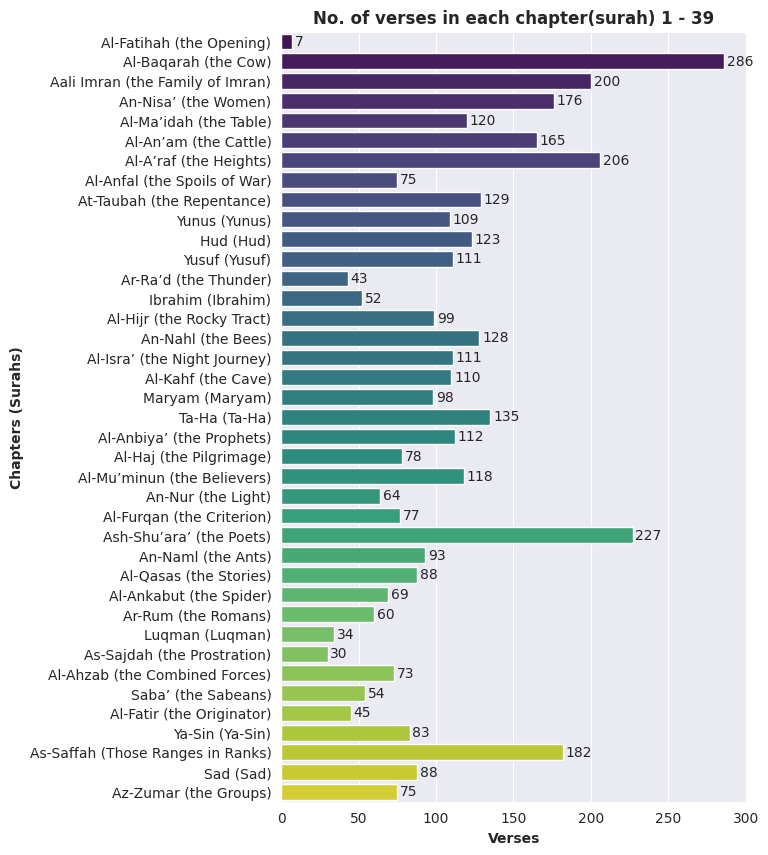

In [21]:
quran_chapters_verses_countplot(surah_1_39, 'Surah Name', 'No. of verses in each chapter(surah) 1 - 39')


/tmp/ipykernel_23585/2852064541.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataframe, y=y_axis, palette='viridis')


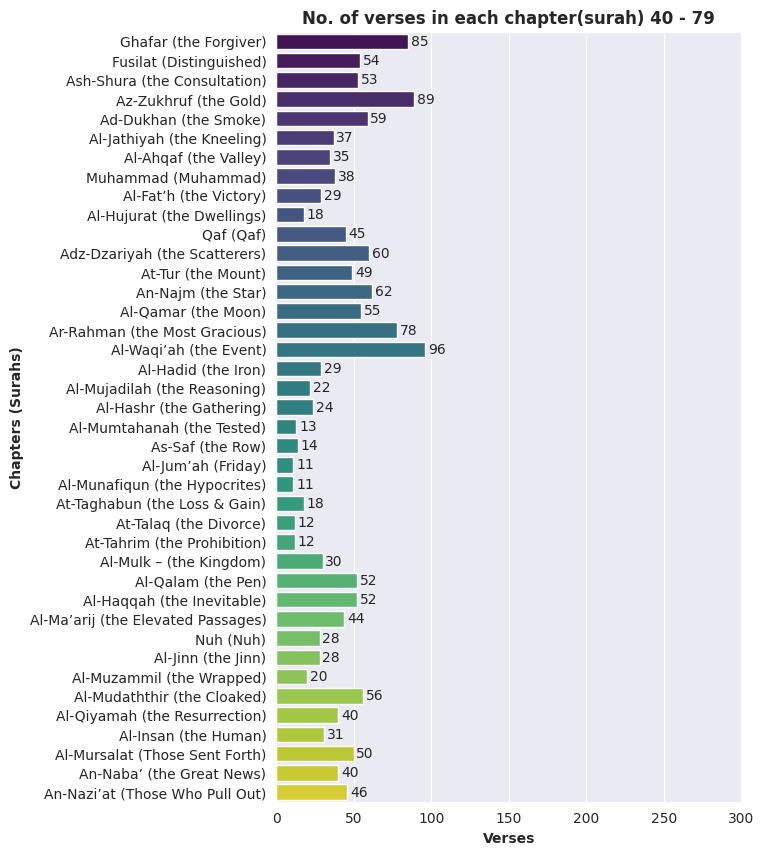

In [22]:
quran_chapters_verses_countplot(surah_40_79, 'Surah Name', 'No. of verses in each chapter(surah) 40 - 79')


/tmp/ipykernel_23585/2852064541.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dataframe, y=y_axis, palette='viridis')


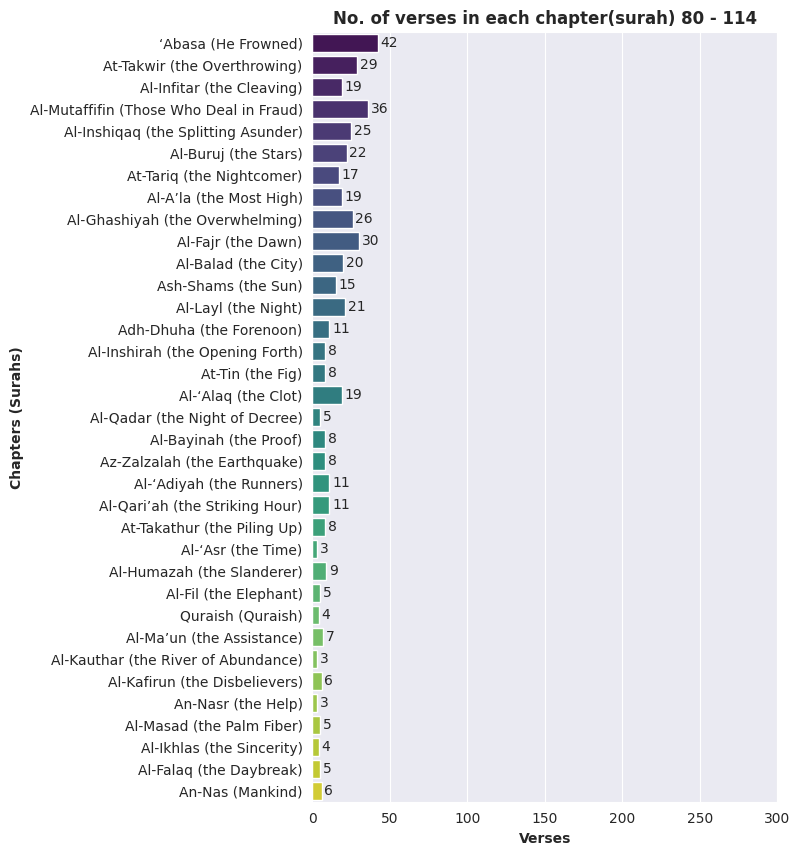

In [23]:
quran_chapters_verses_countplot(surah_80_114, 'Surah Name', 'No. of verses in each chapter(surah) 80 - 114')


Dari ketiga diagram di atas dapat diketahui bahwa
* Al-Baqarah adalah surah terpanjang
* Al-Asr, Al-Kauthar and Al-Nasr adalah surah terpendek dengan hanya mengandung 3 ayat

# Seberapa sering nama-nama Nabi disebutkan dalam Al-Qur'an?

In [24]:
# Daftar nama para nabi yang disebutkan di dalam Al-Qur'an
prophet_names = [ "Isma'il", 'Elisha', 'Zul-Kifl', 'Jesus', 'Moses', "Shu'aib", 'Jacob', 'Lut',
                 'Joseph', 'Isaac', 'Job', 'Aaron', 'Abraham', 'Noah', 'Adam', 'Hud', 'Solomon', 
                 'David', 'Zakariya', 'Yahya', 'Elias', 'Jonah', 'Idris', 'Salih', 'Muhammad']

# Membuat dictionary kosong untuk menyimpan nama para nabi dan frekuensinya
prophet_names_freq = {}

# Menginisiasi dictionary dengan nama para nabi dan frekuensi awal 0
for prophet in prophet_names:
    prophet_names_freq[prophet.lower()] = 0
    
# Kode untuk menghitung frekuensi nama para nabi yang disebutkan di dalam Al-Qur'an
for lab,row in quran_english.iterrows():
    
    # Mengekstrak kata-kata dari setiap ayat dan membaginya menjadi list
    ayah_word_list = row['Text'].split(' ') 
    
    # Pengulangan untuk setiap kata dalam list untuk memeriksa apakah kata tersebut menagndung nama para nabi
    for word in ayah_word_list:
        # Menjadikan setiap kata menjadi huruf kecil semua kata dan menghapus karakter khusus selain huruf menggunakan regex
        word = word.lower()
        pattern = re.compile('[^a-zA-Z-\']') 
        word = pattern.sub('', word) 
        
        # Jika kata tersebut merupakan nama nabi, maka tambahkan frekuensinya
        if word in prophet_names_freq:
            prophet_names_freq[word] += 1

# Membuat dataframe dari dictionary para nabi    
prophet_names_df = pd.DataFrame({ 'Name' : list(prophet_names_freq.keys()),
                                  'Frequency' : list(prophet_names_freq.values())})

prophet_names_df['Name'] = prophet_names_df['Name'].apply(str.capitalize)

prophet_names_df.sort_values('Frequency', ascending=False, inplace=True)

/tmp/ipykernel_23585/3570907879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=prophet_names_df, x='Name', y='Frequency',palette='husl')


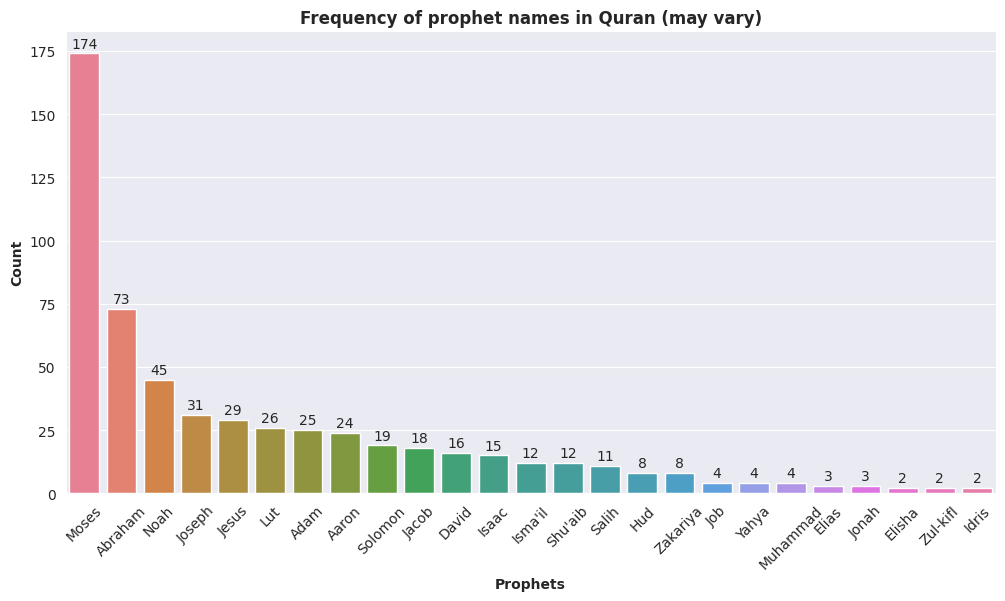

In [25]:
# Membuat diagram frekuensi nama para nabi
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
ax = sns.barplot(data=prophet_names_df, x='Name', y='Frequency',palette='husl')

for container in ax.containers:
    ax.bar_label(container, size=10, padding=2)
    
ax.set_title("Frequency of prophet names in Quran (may vary)", fontweight='bold', fontsize=12)
ax.set_ylabel("Count", fontweight='bold')
ax.set_xlabel("Prophets", fontweight='bold')
ax.tick_params('x', rotation=45)
    
plt.show()

Dari diagram diatas diketahui:
* Moses (Nabi Musa Alayhi salam) paling banyak disebutkan dalam Al-Quran diikuti oleh Abraham (Nabi Ibrahim alayhi salam), Noah (Nabi Nuh Alayhi salam) dan Joseph (Nabi Yusuf Alayhi salam).
* Jumlah frekuensi ini dapat bervariasi dari satu terjemahan ke terjemahan lain dari berbagai bahasa dan Mufasir.

**Pertanyaannya**: Mengapa Nabi Muhammad Shalallahu alayhi salam sedikit disebutkan dalam Al-Qu'ran, padahal Al-Qur'an diturunkan kepada Beliau (shalallahu alayhi salam)?? Silakan kalian jawab ya :)

# Word Cloud dalam Al-Qur'an

Pada bagian ini kita akan membuat word cloud (awan kata) dari Al-Qur'an berdasarkan kategori yang berbeda dalam bahasa Inggris dan bahasa Arab. Word cloud dibentuk berdasarkan kata-kata yang paling sering muncul.

Kategori-kategori yang berbeda ini meliputi:

* Word cloud dari Seluruh Al-Quran dalam bahasa Inggris dan Arab
* Word cloud semua Surat Al-Quran dalam bahasa Inggris dan Arab
* Word cloud Surah Makkiyah dan Madaniyah dalam bahasa Inggris dan Arab

**HARAP DICATAT BAHWA** wordcloud ini hanyalah perkiraan kasar sederhana atau simulasi dari kata-kata yang paling sering muncul dalam Al-Quran dan tidak mempertimbangkan penggunaan kata ganti dan lain-lain yang digunakan dalam Al-Quran.

Langkah pertama adalah kita membuat corpus. Corpus adalah kumpulan teks yang akan diolah nanti untuk menjadi word cloud. Karena kita akan membuat dua versi word cloud, yaitu bahasa Inggris dan bahasa Arab, maka dari itu kita membuat 2 corpus, Inggris dan Arab

In [26]:
eng_corpus = []
for num in range(1,115):
    full_surah = ""
    for aya in quran_english_witharab[quran_english_witharab.Surah==num].Text:
        full_surah +=  aya + " "
    eng_corpus.append(full_surah)

arabic_corpus = []
for num in range(1,115):
    full_surah = ""
    for aya in quran_english_witharab[quran_english_witharab.Surah==num].AyahText:
        full_surah +=  aya + " "
    arabic_corpus.append(full_surah)


Lalu selanjutnya kita buat list nama surah dalam bahasa inggris dan bahasa arab

In [28]:
surah_name = """1. Al-Fatihah (the Opening)
2. Al-Baqarah (the Cow)
3. Aali Imran (the Family of Imran)
4. An-Nisa’ (the Women)
5. Al-Ma’idah (the Table)
6. Al-An’am (the Cattle)
7. Al-A’raf (the Heights)
8. Al-Anfal (the Spoils of War)
9. At-Taubah (the Repentance)
10. Yunus (Yunus)
11. Hud (Hud)
12. Yusuf (Yusuf)
13. Ar-Ra’d (the Thunder)
14. Ibrahim (Ibrahim)
15. Al-Hijr (the Rocky Tract)
16. An-Nahl (the Bees)
17. Al-Isra’ (the Night Journey)
18. Al-Kahf (the Cave)
19. Maryam (Maryam)
20. Ta-Ha (Ta-Ha)
21. Al-Anbiya’ (the Prophets)
22. Al-Haj (the Pilgrimage)
23. Al-Mu’minun (the Believers)
24. An-Nur (the Light)
25. Al-Furqan (the Criterion)
26. Ash-Shu’ara’ (the Poets)
27. An-Naml (the Ants)
28. Al-Qasas (the Stories)
29. Al-Ankabut (the Spider)
30. Ar-Rum (the Romans)
31. Luqman (Luqman)
32. As-Sajdah (the Prostration)
33. Al-Ahzab (the Combined Forces)
34. Saba’ (the Sabeans)
35. Al-Fatir (the Originator)
36. Ya-Sin (Ya-Sin)
37. As-Saffah (Those Ranges in Ranks)
38. Sad (Sad)
39. Az-Zumar (the Groups)
40. Ghafar (the Forgiver)
41. Fusilat (Distinguished)
42. Ash-Shura (the Consultation)
43. Az-Zukhruf (the Gold)
44. Ad-Dukhan (the Smoke)
45. Al-Jathiyah (the Kneeling)
46. Al-Ahqaf (the Valley)
47. Muhammad (Muhammad)
48. Al-Fat’h (the Victory)
49. Al-Hujurat (the Dwellings)
50. Qaf (Qaf)
51. Adz-Dzariyah (the Scatterers)
52. At-Tur (the Mount)
53. An-Najm (the Star)
54. Al-Qamar (the Moon)
55. Ar-Rahman (the Most Gracious)
56. Al-Waqi’ah (the Event)
57. Al-Hadid (the Iron)
58. Al-Mujadilah (the Reasoning)
59. Al-Hashr (the Gathering)
60. Al-Mumtahanah (the Tested)
61. As-Saf (the Row)
62. Al-Jum’ah (Friday)
63. Al-Munafiqun (the Hypocrites)
64. At-Taghabun (the Loss & Gain)
65. At-Talaq (the Divorce)
66. At-Tahrim (the Prohibition)
67. Al-Mulk – (the Kingdom)
68. Al-Qalam (the Pen)
69. Al-Haqqah (the Inevitable)
70. Al-Ma’arij (the Elevated Passages)
71. Nuh (Nuh)
72. Al-Jinn (the Jinn)
73. Al-Muzammil (the Wrapped)
74. Al-Mudaththir (the Cloaked)
75. Al-Qiyamah (the Resurrection)
76. Al-Insan (the Human)
77. Al-Mursalat (Those Sent Forth)
78. An-Naba’ (the Great News)
79. An-Nazi’at (Those Who Pull Out)
80. ‘Abasa (He Frowned)
81. At-Takwir (the Overthrowing)
82. Al-Infitar (the Cleaving)
83. Al-Mutaffifin (Those Who Deal in Fraud)
84. Al-Inshiqaq (the Splitting Asunder)
85. Al-Buruj (the Stars)
86. At-Tariq (the Nightcomer)
87. Al-A’la (the Most High)
88. Al-Ghashiyah (the Overwhelming)
89. Al-Fajr (the Dawn)
90. Al-Balad (the City)
91. Ash-Shams (the Sun)
92. Al-Layl (the Night)
93. Adh-Dhuha (the Forenoon)
94. Al-Inshirah (the Opening Forth)
95. At-Tin (the Fig)
96. Al-‘Alaq (the Clot)
97. Al-Qadar (the Night of Decree)
98. Al-Bayinah (the Proof)
99. Az-Zalzalah (the Earthquake)
100. Al-‘Adiyah (the Runners)
101. Al-Qari’ah (the Striking Hour)
102. At-Takathur (the Piling Up)
103. Al-‘Asr (the Time)
104. Al-Humazah (the Slanderer)
105. Al-Fil (the Elephant)
106. Quraish (Quraish)
107. Al-Ma’un (the Assistance)
108. Al-Kauthar (the River of Abundance)
109. Al-Kafirun (the Disbelievers)
110. An-Nasr (the Help)
111. Al-Masad (the Palm Fiber)
112. Al-Ikhlas (the Sincerity)
113. Al-Falaq (the Daybreak)
114. An-Nas (Mankind)"""

surah_name = list(map(lambda x: x.split(' ')[1], (surah_name.split('\n'))))


site =  r.get('https://gpsarab.com/shop11/en/content/11-list-of-surahs-in-the-holy-quran').content
soup = BeautifulSoup(site, "html.parser")
surah_name_arabic = [s.text for s in soup.findAll('td')]
surah_name_arabic = [surah_name_arabic[x] for x in range(1, len(surah_name_arabic),5)]

for (i, x ),y  in zip(enumerate(surah_name),surah_name_arabic):
    print("{} -> {} -> {}".format(i,x,y))

0 -> Al-Fatihah -> الفَاتِحَة
1 -> Al-Baqarah -> البَقَرَة
2 -> Aali -> آل عِمرَان
3 -> An-Nisa’ -> النِّسَاء
4 -> Al-Ma’idah -> المَائدة
5 -> Al-An’am -> الأنعَام
6 -> Al-A’raf -> الأعرَاف
7 -> Al-Anfal -> الأنفَال
8 -> At-Taubah -> التوبَة
9 -> Yunus -> يُونس
10 -> Hud -> هُود
11 -> Yusuf -> يُوسُف
12 -> Ar-Ra’d -> الرَّعْد
13 -> Ibrahim -> إبراهِيم
14 -> Al-Hijr -> الحِجْر
15 -> An-Nahl -> النَّحْل
16 -> Al-Isra’ -> الإسْرَاء
17 -> Al-Kahf -> الكهْف
18 -> Maryam -> مَريَم
19 -> Ta-Ha -> طه
20 -> Al-Anbiya’ -> الأنبيَاء
21 -> Al-Haj -> الحَج
22 -> Al-Mu’minun -> المُؤمنون
23 -> An-Nur -> النُّور
24 -> Al-Furqan -> الفُرْقان
25 -> Ash-Shu’ara’ -> الشُّعَرَاء
26 -> An-Naml -> النَّمْل
27 -> Al-Qasas -> القَصَص
28 -> Al-Ankabut -> العَنكبوت
29 -> Ar-Rum -> الرُّوم
30 -> Luqman -> لقمَان
31 -> As-Sajdah -> السَّجدَة
32 -> Al-Ahzab -> الأحزَاب
33 -> Saba’ -> سَبَأ
34 -> Al-Fatir -> فَاطِر
35 -> Ya-Sin -> يس
36 -> As-Saffah -> الصَّافات
37 -> Sad -> ص
38 -> Az-Zumar -> الزُّمَر
39 -> Ghafa

Selanjutnya kita menentukan daftar stopwords. Stopwords adalah kumpulan kata-kata yang biasanya diabaikan saat melakukan analisis teks. Kata ini dianggap umum dan tidak memiliki makna khusus. Karena kita akan membuat dua versi word cloud, yaitu bahasa Inggris dan bahasa Arab, maka dari itu kita membuat 2 stopwords, Inggris dan Arab

In [29]:
##### STOPWORDS CELL  ######


### to get redundant words(pronouns etc) so we can omit them later on
SW = list(STOPWORDS) + ['ye', 'verily', 'will', 'said', 'say', 'us', 'thy', 'thee', 'thou',
                        'the', 'and', 'of', 'to', 'is', 'in', 'they', 'a', 'that', 'for', 
                        'ye', 'who', 'their', 'not', 'them', 'He', 'be', 
                        'We', 'those', 'with', 'have', 'are', 'And', 'from', 'it', 'but', 
                        'on', 'you', 'your', 'all', 'as', 'he', 'shall', 'if', 'thou', 'no',
                        'which', 'But', 'do', 'his', 'what', 'I', 'or', 'when', 'we', 'by', 
                        'His', 'said:', 'thy', 'has', 'this', 'They', 'there', 
                        'then', 'one', 'my', 'him', 'were', 'was', 'thee', 'them,', 'may', 'any',
                        'had', 'sent', 'before', 'nor', 'among', 'whom', 'Day', 'hath', 'made', 
                        'did', '(of', 'Who', 'would', '(in', 'out', 'Say:', 'our', 'indeed',
                        'so', 'If', '(to', '(the', 'against', 'been', 'an', 'For', 'you,', 
                        'us', 'The', 'Then', 'fear', 'than', 'give', '-', 'should', 'such', 'Most',
                        'down', 'men', 'So', 'say:', '"O', 'Our', 'It', 'come', 'can', 'after', 'O', 
                        'me', 'some', 'turn', '', 'over', 'up', 'things', 'make', 'know',
                        'reject', 'When', 'unto', 'into', 'its', 'see', 'Those', 'only', 
                        'them:','good', 'own', 'doth', 'of)', 'most', 'other', 'nay',
                        'except', '(for', 'Thou', 'at', '(and', 'between', 'take', 'away',
                        'given', 'every', 'back', 'say,', 'verily', 'never', 'That', 'said'
                       'whose', 'where', 'which', 'how', 'when']

### arabic redundant words
s = ['من', 'في', 'ما',
       'إن', 'لا', 'على', 'إلا', 'ولا', 'وما', 'أن', 'قال', 'إلى', 'لهم', 'يا', 'ومن', 'ثم', 'لكم', 'به', 'كان', 'بما'
       , 'قل', 'ذلك', 'أو', 'له', 'الذي', 'هو',  'هم', 'وإن', 'قالوا', 'كل', 'فيها', 'كانوا', 'عن', 'إذا',  'عليهم', 
       'شيء', 'هذا', 'كنتم',  'لم', 'وهو', 'فإن', 'إذ',  'عليكم',  'إنا', 'فلا', 'منهم',  'أيها', 'إنه','بعد', 'عليه',
       'حتى', 'وهم', 'وإذا', 'أولئك', 'أم', 'إني', 'ولقد', 'فيه', 'بل', 'قد', 'عند', 'إنما', 'ولكن', 'ولو',
       'مما',  'منكم', 'فلما', 'ألا', 'لمن',  'دون', 'فمن', 'منه', 'فإذا', 'فما', 'منها', 'كذلك', 'وقال', 'وكان']
ASW1 = [arabic_reshaper.reshape(x) for x in s]


### fetched this list of stopwords of arabic 
# from https://github.com/mohataher/arabic-stop-words/blob/master/list.txt
s = """ء
ءَ
آ
آب
آذار
آض
آل
آمينَ
آناء
آنفا
آه
آهاً
آهٍ
آهِ
أ
أبدا
أبريل
أبو
أبٌ
أجل
أجمع
أحد
أخبر
أخذ
أخو
أخٌ
أربع
أربعاء
أربعة
أربعمئة
أربعمائة
أرى
أسكن
أصبح
أصلا
أضحى
أطعم
أعطى
أعلم
أغسطس
أفريل
أفعل به
أفٍّ
أقبل
أكتوبر
أل
ألا
ألف
ألفى
أم
أما
أمام
أمامك
أمامكَ
أمد
أمس
أمسى
أمّا
أن
أنا
أنبأ
أنت
أنتم
أنتما
أنتن
أنتِ
أنه
أنًّ
أنّى
أهلا
أو
أوت
أوشك
أول
أولئك
أولاء
أولالك
أوّهْ
أى
أي
أيا
أيار
أيضا
أيلول
أين
أيّ
أيّان
أُفٍّ
ؤ
إذ
إذا
إذاً
إذما
إذن
إزاء
إلى
إلي
إليكم
إليكما
إليكنّ
إليكَ
إلَيْكَ
إلّا
إمّا
إن
إنَّ
إى
إياكم
إياكما
إياكن
إيانا
إياه
إياها
إياهم
إياهما
إياهن
إياي
إيهٍ
ئ
ا
ا?
ا?ى
االا
االتى
ابتدأ
ابين
اتخذ
اثر
اثنا
اثنان
اثني
اثنين
اجل
احد
اخرى
اخلولق
اذا
اربعة
اربعون
اربعين
ارتدّ
استحال
اصبح
اضحى
اطار
اعادة
اعلنت
اف
اكثر
اكد
الآن
الألاء
الألى
الا
الان
الاولى
التى
التي
الحالي
الذاتي
الذى
الذي
الذين
السابق
الف
اللاتي
اللتان
اللتيا
اللتين
اللذان
اللذين
اللواتي
الماضي
المقبل
الوقت
الى
الي
اليه
اليها
اما
امام
امس
امسى
ان
انبرى
انقلب
انه
انها
او
اول
اي
ايار
ايام
ايضا
ب
بؤسا
بإن
بئس
باء
بات
باسم
بان
بخٍ
بد
بدلا
برس
بسبب
بسّ
بشكل
بضع
بطآن
بعد
بعدا
بعض
بغتة
بل
بلى
بن
به
بها
بهذا
بيد
بين
بَسْ
بَلْهَ
ة
ت
تاء
تارة
تاسع
تانِ
تانِك
تبدّل
تجاه
تحوّل
تخذ
ترك
تسع
تسعة
تسعمئة
تسعمائة
تسعون
تسعين
تشرين
تعسا
تعلَّم
تفعلان
تفعلون
تفعلين
تكون
تلقاء
تلك
تم
تموز
تينك
تَيْنِ
تِه
تِي
ث
ثاء
ثالث
ثامن
ثان
ثاني
ثلاث
ثلاثاء
ثلاثة
ثلاثمئة
ثلاثمائة
ثلاثون
ثلاثين
ثم
ثمان
ثمانمئة
ثمانون
ثماني
ثمانية
ثمانين
ثمنمئة
ثمَّ
ثمّ
ثمّة
ج
جانفي
جدا
جعل
جلل
جمعة
جميع
جنيه
جوان
جويلية
جير
جيم
ح
حاء
حادي
حار
حاشا
حاليا
حاي
حبذا
حبيب
حتى
حجا
حدَث
حرى
حزيران
حمدا
حمو
حمٌ
حوالى
حول
حيث
حيثما
حين
حيَّ
حَذارِ
خ
خاء
خاصة
خال
خامس
خلا
خلافا
خلال
خلف
خمسة
خمسمئة
خمسمائة
خمسون
خمسين
خميس
د
دال
درهم
درى
دواليك
دولار
دون
دونك
ديسمبر
دينار
ذ
ذا
ذات
ذاك
ذال
ذانك
ذانِ
ذلك
ذهب
ذو
ذيت
ذينك
ذَيْنِ
ذِه
ذِي
ر
رأى
راء
رابع
راح
رجع
رزق
رويدك
ريال
ريث
ز
زاي
زعم
زود
زيارة
س
ساء
سادس
سبت
سبتمبر
سبحان
سبعة
سبعمئة
سبعمائة
سبعون
سبعين
ست
ستة
ستكون
ستمئة
ستمائة
ستون
ستين
سحقا
سرا
سرعان
سقى
سمعا
سنتيم
سنوات
سوف
سوى
سين
ش
شباط
شبه
شتانَ
شخصا
شرع
شيكل
شين
شَتَّانَ
ص
صاد
صار
صباح
صبر
صبرا
صدقا
صراحة
صفر
صهٍ
صهْ
ض
ضاد
ضحوة
ضد
ضمن
ط
طاء
طاق
طالما
طرا
طفق
طَق
ظ
ظاء
ظل
ظلّ
ظنَّ
ع
عاد
عاشر
عام
عاما
عامة
عجبا
عدا
عدة
عدد
عدم
عدَّ
عسى
عشر
عشرة
عشرون
عشرين
عل
علق
علم
على
علي
عليك
عليه
عليها
علًّ
عن
عند
عندما
عنه
عنها
عوض
عيانا
عين
عَدَسْ
غ
غادر
غالبا
غدا
غداة
غير
غين
ـ
ف
فإن
فاء
فان
فانه
فبراير
فرادى
فضلا
فقد
فقط
فكان
فلان
فلس
فهو
فو
فوق
فى
في
فيفري
فيه
فيها
ق
قاطبة
قاف
قال
قام
قبل
قد
قرش
قطّ
قلما
قوة
ك
كأن
كأنّ
كأيّ
كأيّن
كاد
كاف
كان
كانت
كانون
كثيرا
كذا
كذلك
كرب
كسا
كل
كلتا
كلم
كلَّا
كلّما
كم
كما
كن
كى
كيت
كيف
كيفما
كِخ
ل
لأن
لا
لا سيما
لات
لازال
لاسيما
لام
لايزال
لبيك
لدن
لدى
لدي
لذلك
لعل
لعلَّ
لعمر
لقاء
لكن
لكنه
لكنَّ
للامم
لم
لما
لمّا
لن
له
لها
لهذا
لهم
لو
لوكالة
لولا
لوما
ليت
ليرة
ليس
ليسب
م
مئة
مئتان
ما
ما أفعله
ما انفك
ما برح
مائة
ماانفك
مابرح
مادام
ماذا
مارس
مازال
مافتئ
ماي
مايزال
مايو
متى
مثل
مذ
مرّة
مساء
مع
معاذ
معه
مقابل
مكانكم
مكانكما
مكانكنّ
مكانَك
مليار
مليم
مليون
مما
من
منذ
منه
منها
مه
مهما
ميم
ن
نا
نبَّا
نحن
نحو
نعم
نفس
نفسه
نهاية
نوفمبر
نون
نيسان
نيف
نَخْ
نَّ
ه
هؤلاء
ها
هاء
هاكَ
هبّ
هذا
هذه
هل
هللة
هلم
هلّا
هم
هما
همزة
هن
هنا
هناك
هنالك
هو
هي
هيا
هيهات
هيّا
هَؤلاء
هَاتانِ
هَاتَيْنِ
هَاتِه
هَاتِي
هَجْ
هَذا
هَذانِ
هَذَيْنِ
هَذِه
هَذِي
هَيْهات
و
و6
وأبو
وأن
وا
واضاف
واضافت
واكد
والتي
والذي
وان
واهاً
واو
واوضح
وبين
وثي
وجد
وراءَك
ورد
وعلى
وفي
وقال
وقالت
وقد
وقف
وكان
وكانت
ولا
ولايزال
ولكن
ولم
وله
وليس
ومع
ومن
وهب
وهذا
وهو
وهي
وَيْ
وُشْكَانَ
ى
ي
ياء
يفعلان
يفعلون
يكون
يلي
يمكن
ين
يناير
يوان
يورو
يوليو
يونيو
ّأيّان
""".split('\n')
ASW2 = [arabic_reshaper.reshape(x) for x in s]


#### Obtained new combined corpus of redundant words
ASW = ASW1 + ASW2

Kemudian kita akan buat function untuk generate word cloud

In [30]:
####  Ini adalah fungsi utama yang akan digunakan untuk menghasilkan berbagai jenis wordcloud
def generateWordCloud(surah=None, corpus=None, title=None, isArabic=False):
    plt.figure(figsize=(15,8))
    
    if not isArabic:
        wc = WordCloud(stopwords=SW, max_words = 80, width=800, height=400, scale=2,
                       background_color='white')
        if surah is None:
            wc.generate(corpus)
            plt.title(title, fontdict={'fontsize':40})
        else:
            wc.generate(eng_corpus[surah])
            plt.title(surah_name[surah], fontdict={'fontsize':40})

    if isArabic:
        wc = WordCloud(font_path='/workspaces/codespaces-jupyter/font/arial.ttf', #relative_scaling=1,
                       stopwords=ASW, max_words=80, width=800, height=400, scale=2,
                       background_color='white')
        if surah is None:
            wc = wc.generate_from_text((arabic_reshaper.reshape(corpus)))
            plt.title(get_display(arabic_reshaper.reshape(title)), fontdict={'fontsize':40})
        else:
            wc = wc.generate_from_text(get_display(arabic_reshaper.reshape(arabic_corpus[surah])))
            plt.title(get_display(arabic_reshaper.reshape(surah_name_arabic[surah])), fontdict={'fontsize':40})

    plt.imshow(wc)
    plt.axis('off')
    

# Word Cloud untuk seluruh surah dalam bahasa Inggris

Panggil function generateWordCloud dengan argumen korpus = all_eng

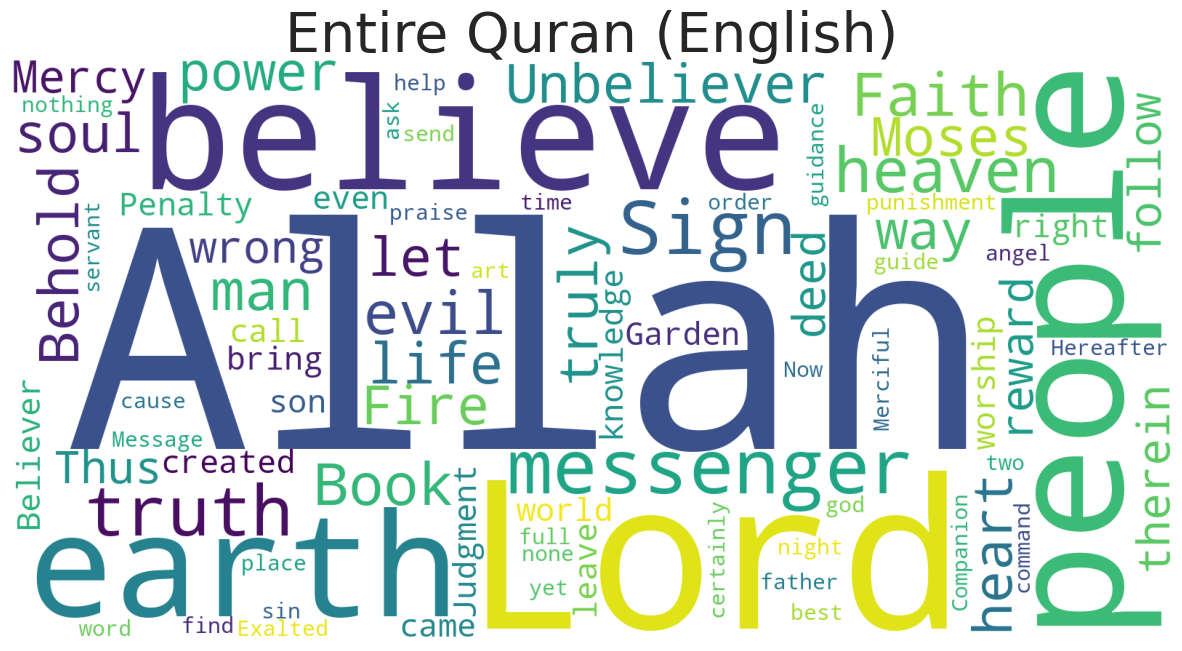

In [32]:
all_eng = ' '.join(eng_corpus)
generateWordCloud(corpus=all_eng, title='Entire Quran (English)')

Dari word cloud diatas menunjukkan bahwa:
* Kata 'Allah' adalah yang paling banyak ditemukan karena Al-Qur'an berasal dari perkataan Allah
* Kata 'Messenger' artinya utusan, juga terlihat cukup jelas karena Al-Quran berbicara tentang banyak kejadian tentang para utusan/rasul terdahulu
* Kata 'Sign' artinya tanda, Allah berfirman berkali-kali agar kita mengamati dan memperhatikan tanda-tanda kebesaran Allah disekitar kita

dan masih banyak kata yang lain

# Word Cloud untuk seluruh surah dalam bahasa Arab

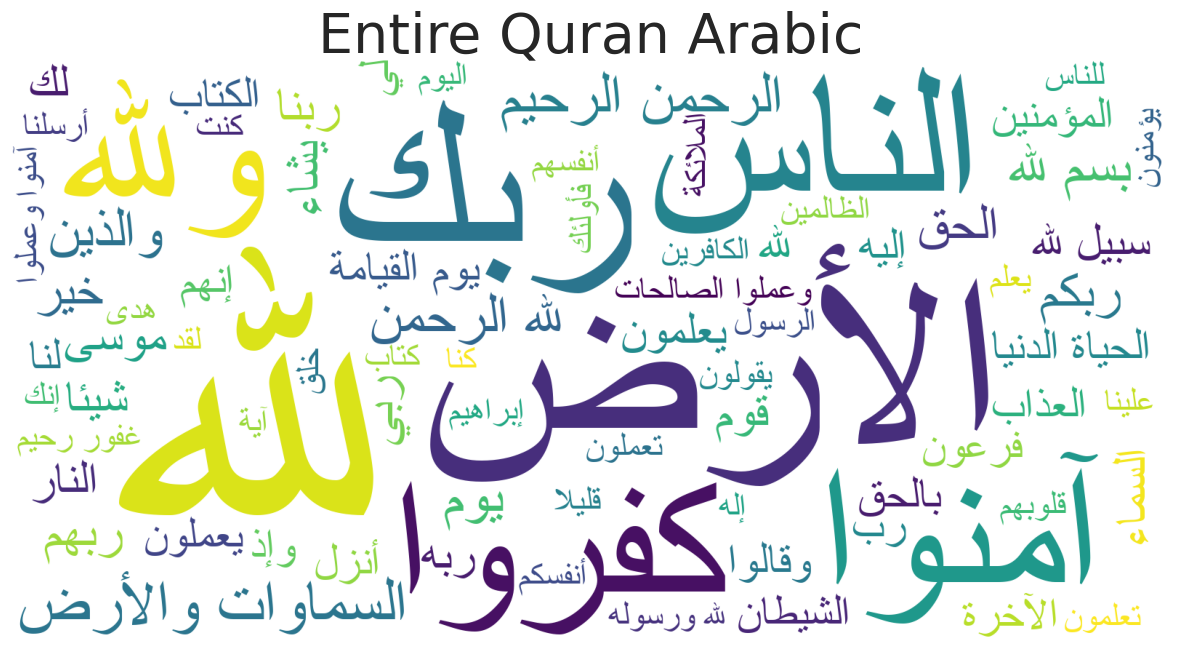

In [33]:
all_arabic = ' '.join(arabic_corpus)
generateWordCloud(corpus=all_arabic, title='Entire Quran Arabic', isArabic=True)


Dari word cloud di atas menunjukkan bahwa
* Kata "Allah" muncul paling besar, jelas karena Al-Qur'an merupakan kalamullah
* Kata "Rabbuk" yang berarti "Tuhan Kamu" terlihat muncul jelas karena Allah adalah Tuhan yang mewahyukan Al-Qur'an kepada Rasulullah Shalallahu Alayhi wa Sallam
* Kata "An-Naas", "Aamanu" dan "Kafaru" yang artinya manusia, orang-orang beriman dan orang-orang kafir sering di mention berkali-kali dalam Al-Quran
* Kata "As samawaat wal Ardh" yang artinya langit dan bumi sering juga berkali-kali di mention dalam banyak surah

dan masih banyak kata yang lain

**Harap diketahui bahwa perbedaan word cloud dalam Alquran Inggris dan Arab disebabkan oleh perbedaan terjemahan**

# Word Cloud untuk masing-masing surah dalam bahasa Inggris

Saya akan membuat word cloud surah Yusuf, surah favorit saya. Surat Yusuf adalah kisah terbaik dalam Al-Quran kalin harus membacanya

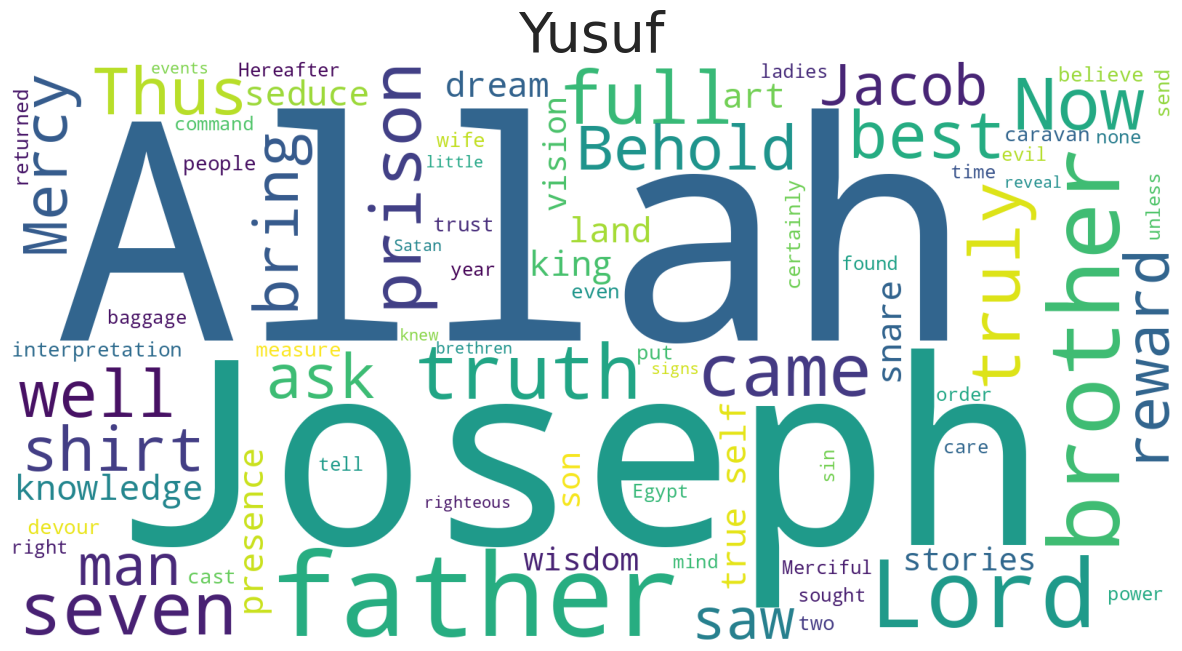

In [34]:
generateWordCloud(surah=11, corpus=eng_corpus)


Word Cloud di atas menunjukkan bahwa:
* Perhatikan bagaimana kata "Joseph" dan "Allah" menggunakan huruf yang paling besar. Ini masuk akal karena Surat ini bercerita tentang Nabi Yusuf Alayhi Salam sendiri
* Kata "Father" dan "Brother" juga cukup jelas karena ayah nabi Yusuf Alayhi Salam (Yakub Alayhi salam) dan saudara-saudara nabi Yusuf alayhi salam banyak dibicarakan dalam Surah ini
* Kata "Seven" juga terlihat yang ada dalam mimpi Nabi Yusuf Alayhi salam, yaitu tujuh ekor sapi kurus memakan tujuh ekor sapi gemuk
* Kata "Shirt" atau baju yang saudara-saudara yusuf bawa kembali kepada Ayahnya, Yakub Alayhi salam, yang mereka klaim serigala telah memakan Nabi Yusuf
* Kata "Seduce" atau menggoda ketika istri penguasa mesir yang mencoba menggoda Nabi Yusuf Alayhi Salam

dan masih banyak kata yang lain

Sekarang mari kita lihat Surah Al Haqqah

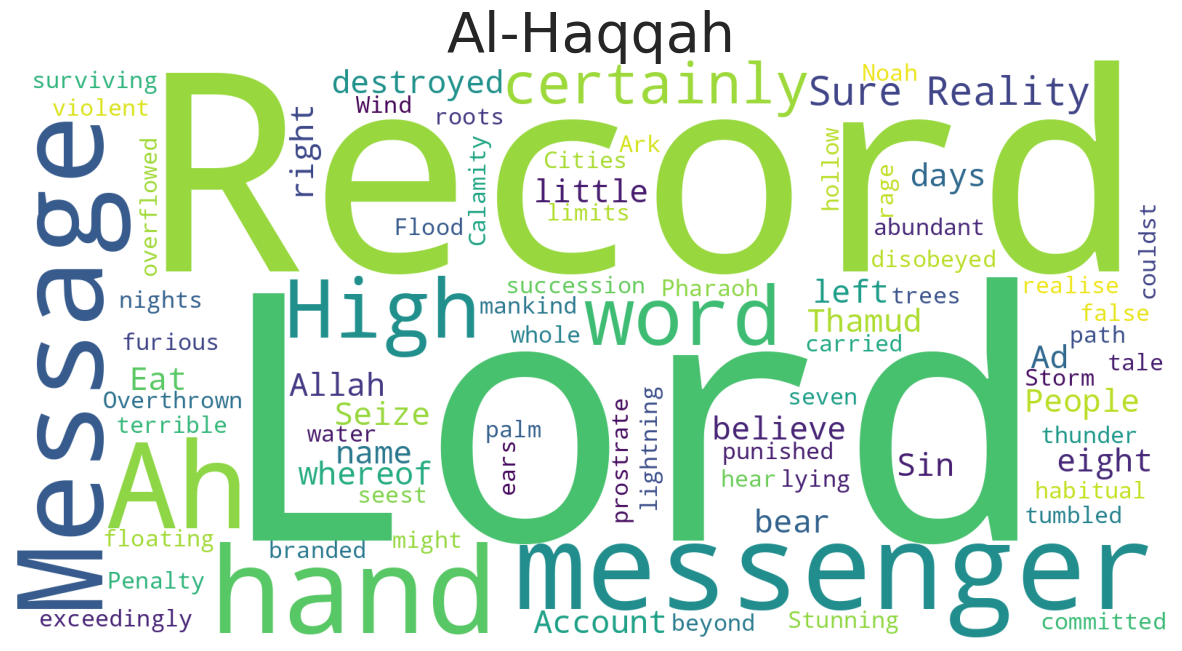

In [35]:
generateWordCloud(68, eng_corpus)


Word Cloud di atas menunjukkan bahwa:
* Kata "Lord" dan "Record" menggunakan huruf yang paling besar karena kelak Allah akan berbicara tentang catatan amal umat manusia ketika hari pembalasan nanti dan catatan amal setiap manusia akan diberikan kepada masing-masing orang. Dengan demikian kata "Record" dan "Lord" adalah yang paling jelas.
* Kata "Hand", "Right", dan "Left" menunjukkan orang-orang yang berada di sebelah kanan (golongan yang benar) dan di sebelah kiri (golongan yang salah). Orang yang berada di kanan adalah mereka yang menerima catatan amal dengan tangan kanannya, kedudukan mereka di bawah kedudukan golongan as-Sabiquna al- Muqarrabun. Golongan kiri adalah mereka yang menerima buku catatan amalnya dengan menggunakan tangan kiri mereka. Betapa rendah posisi mereka dengan masuk kedalam neraka. Mereka adalah para pemilik kedudukan yang hina.
* Kata "Wind", "Water', "Thunder", dan "Storm" menunjukkan bagaimana kaum "Ad", "Tsamud", dan kaum Nabi Nuh Alayhi salam "Destroyed" (dihancurkan oleh Allah Subhanahu wa ta'ala)

dan masih banyak kata yang lain

Sekarang, mari kita lihat word cloud untuk setiap surah di Al-Qur'an mulai dari Surah Al-Fatihah sampai Surah An-Nas

In [36]:
for i in range(len(eng_corpus)):
    generateWordCloud(i, eng_corpus)

/tmp/ipykernel_23585/3462399131.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,8))


# 